#**ML Foundations Assignment**

#Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a brief example for each

1. AL(Artificial Intelligence): Describes, how computers and technology mimic human mind/intelligence. In other words, it is a smart app that performs any task without human interference.  Eg - Chatbots, Self -driving cars

2. Machiine Learning (ML):
It is a subset ofAI. It focusesto create statistical models and  algorithm, to help computer to make predictions,  without explicitly programmed. Eg - Spam detection, Customer churn prediction, Medical Diaganosis.

3. Deep Learning  (DL):
It is a subset of ML or specialised ML algorithms, that mimics human brain. Eg _ Chat GPT. Eg - Face Recognition, Speech-to-text, Autonomous vehicles.

4. Data  Science (DS):
It is broader than  AI and ML. It extracts insights from statisticsm Ml, domain knowledge. Its techniques include, data cleanind, Exploratory DA, statistical modelling, data visualizations, SQL, Python Dashboards.


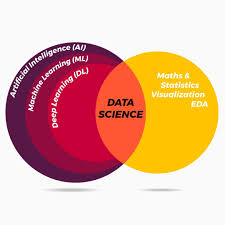

#Q2. Explain overfitting and underfitting a.in ML. How can you detect and prevent them?

1. Overfitting : The model learns the training data too well,  including the noise and random variations. It performs excellent on training data, but poor on the unseen data. The mosel is too simple and hence the variance is  high.

2. Underfitting - The model is too simple and cannot learn the underlying pattern. It performs poor on both training and test data. An overly siple model under fits because, it has few parameters, strong asssumptions, and very basic relationships. So when the real world data has complex and interacting patterns, the simple model  cannot capture them and thus leads to high bias.

***BIAS-VARIANCE TRADE OFF*** -
BIAS - comes from overly simplified models, and leads to underfitting

VARIANCE - comes from overly complex models- which leads to overfitting

***Detection of overfitting and Underfitting***

a.Overfitting - High training accuracy and  low test accuracy is the biggest sign of overfitting. Large gaps in training loss  and validation loss.

b.Underfitting - Low accuracy on both train and test test. High bias in errors.Training loss is high.

***Prevention***-

a. Overfitting - Stop training when validation loss starts increasing. :Limit the depth  of decision trees, reduce number of layers or neurons in deep learning.

b.Underfitting - Increase tree depth. Add more neurons or neural networks. Too much regularisations can oversimplify the model


#Q3.How would you handle missing values in a dataset? Explain at least three methods with examples. Hint: Consider deletion, mean/median imputation, and predictive modeling.

1. Deletion - You remove entire rows that contains missing values (NaN).
It is used when missing,missing values are very few, data is missing at random, removing rows won't hurt the dataset.

2. Mean/Median Inputation.
Mean - for normal distributed data. Median for skewed or outlier- heavy data.
Eg - Mean = (180 + 190 + 200 + 170, NaN)
find the mean = 185. Replace the NaN with 185.

Median = (20k, 25, 30k, 6 lakh, NaN) - use Median and not mean because of  heavy outliers.

3. Predictive Modelling-

Treat the columns  with missing  values as  the target. Use regression for numeric data , classification model for categorical data.

#Q4 What is an imbalanced dataset? Describe two techniques to handle(theoretical + practical). Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models.

1. SMOTE( Synthetic Minority Over-Sampling Techniques):
Creates synthetic data points, and not duplicates. It is used when data set is small and when you dont want to lose information

2. Undersampling - Reduce thesize of the majority class by randomly removing samples. Balances thee data set by dropping sample. It is used when the data set is large, and when training time needs to be reduced.

3. Class Weight - Instead of changing the data set, change the model's penalty.

In [7]:
#SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd

data = {
    "feature" : [2.0, 2.5, 3.0, 8.0, 9.0],
    "target" :[0,0,0,1,1]
}

df = pd.DataFrame(data)
x = df[["feature"]]
y = df[["target"]]

smote = SMOTE(random_state = 42, k_neighbors=1) # Set k_neighbors to 1 since minority class has only 2 samples
x_res, y_res = smote.fit_resample(x,y)

print(x_res)
print(y_res.value_counts())

    feature
0  2.000000
1  2.500000
2  3.000000
3  8.000000
4  9.000000
5  8.796543
target
0         3
1         3
Name: count, dtype: int64


In [8]:
#UNDERSAMPLING

from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

data = {
    'feature': [2.0, 2.5, 3.0, 3.2, 3.5, 8.0, 9.0],
    'target':  [0,   0,   0,   0,   0,   1,   1]
}

df = pd.DataFrame(data)

X = df[['feature']]
y = df['target']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(X_res)
print(y_res.value_counts())


   feature
1      2.5
4      3.5
5      8.0
6      9.0
target
0    2
1    2
Name: count, dtype: int64


In [9]:
# CLASS WEIGHT
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_features=5,
                           weights=[0.9, 0.1],
                           random_state=42)

model = LogisticRegression(class_weight='balanced')

# Train
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Check performance
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.88      0.92       895
           1       0.44      0.83      0.58       105

    accuracy                           0.87      1000
   macro avg       0.71      0.85      0.75      1000
weighted avg       0.92      0.87      0.89      1000



#Q5 . Why is feature scaling important in ML? Compare Min-Max scaling and Standardization. Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient

Feature Scaling is imp because, many ML algorithms work better when features are on similar scale.

***Distance-based algorithms*** - depend on scale

Algorithms like KNN, K-means, SVM use distance (Euclidean, Manhattan).

If one feature has range 0–1000 and another 0–1 →
the large-range feature dominates the distance.

***Gradient-based models*** -  converge faster

Examples: Linear Regression, Logistic Regression, Neural Networks

When features are large, gradients become unstable.

Scaling → smooth, faster, stable training


| Aspect                       | **Min–Max Scaling**                       | **Standardization (Z-score)**           |
| ---------------------------- | ----------------------------------------- | --------------------------------------- |
| Formula                      | (x − min)/(max − min)                     | (x − mean)/std                          |
| Output range                 | **0 to 1** (or custom)                    | No fixed range (centered at 0)          |
| Sensitive to outliers?       | **Yes**                                   | Less sensitive                          |
| Good for                     | Neural networks, KNN, K-means             | Linear/Logistic Regression, SVM, PCA    |
| Keeps shape of distribution? | Yes                                       | Yes but rescales                        |
| When to use                  | When you know min/max and no big outliers | When data is normal-ish OR has outliers |


#Q6.  Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other? Hint: Consider categorical variables with ordinal vs. nominal relationships.

1. Label Encoding - is used when the category has a natural  order. Like -

Sizes --> Small < Medium < Large

Education --> High school < Bachelor < Masters

Ratings --> Bad < Average < Good

used - categories have ranking

2. One - Hot encoding

It is used for categorical data that has no order vlike - Gender, City, Color, Country

use - categories have no order.

#Q7. Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?

In [19]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("googleplaystoredata.csv")
df.head(11)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [14]:
df.Rating

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [15]:
df.Rating.value_counts()

,count
Rating,
4.4,1109
4.3,1076
4.5,1038
4.2,952
4.6,823
4.1,708
4.0,568
4.7,499
3.9,386


In [16]:
df_cleaned = df.dropna(subset=['Rating']).copy()

avg_ratings_by_category = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("\nCategories with Highest Average Ratings:")
display(avg_ratings_by_category.head())


Categories with Highest Average Ratings:


,Rating
Category,
1.9,19.000000
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067


In [17]:
print("\nCategories with Lowest Average Ratings:")
display(avg_ratings_by_category.tail())


Categories with Lowest Average Ratings:


,Rating
Category,
LIFESTYLE,4.094904
VIDEO_PLAYERS,4.063750
MAPS_AND_NAVIGATION,4.051613
TOOLS,4.047411
DATING,3.970769


/tmp/ipython-input-3580282654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_by_category.index, y=avg_ratings_by_category.values, palette='viridis')


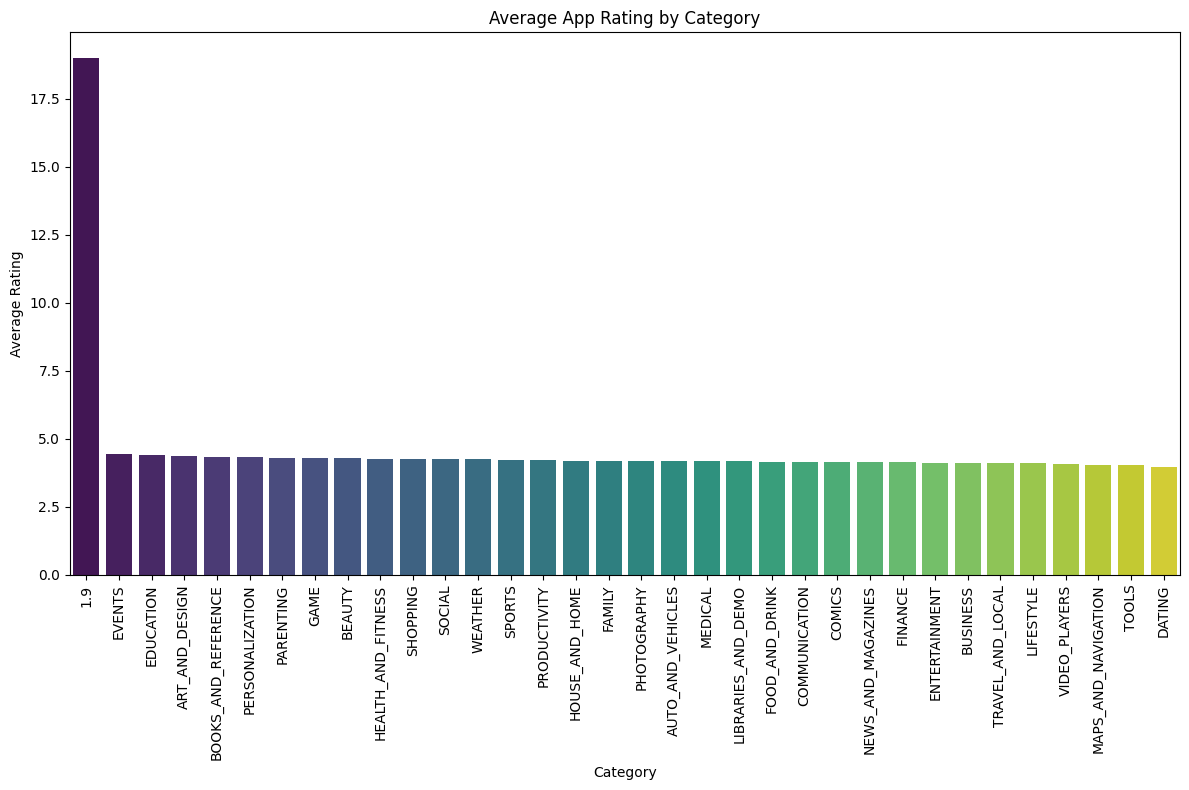

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_ratings_by_category.index, y=avg_ratings_by_category.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Possible category columns: ['Category']
Possible rating columns: ['Rating', 'Content Rating']


,Category,mean,count,median
0,1.9,19.000000,1,19.0
11,EVENTS,4.435556,45,4.5
9,EDUCATION,4.389032,155,4.4
1,ART_AND_DESIGN,4.358065,62,4.4
4,BOOKS_AND_REFERENCE,4.346067,178,4.5
24,PERSONALIZATION,4.335987,314,4.4
23,PARENTING,4.300000,50,4.4
15,GAME,4.286326,1097,4.4
3,BEAUTY,4.278571,42,4.3
16,HEALTH_AND_FITNESS,4.277104,297,4.5


/tmp/ipython-input-3742834247.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_rating, x="mean", y=cat_col, palette="viridis", order=cat_rating[cat_rating["count"] > 20][cat_col])


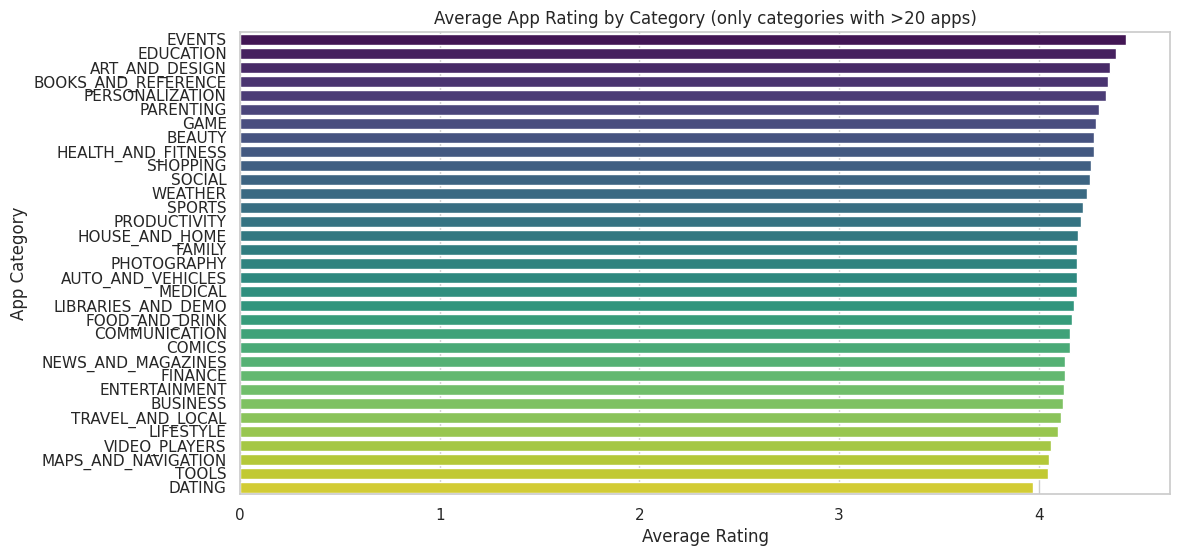

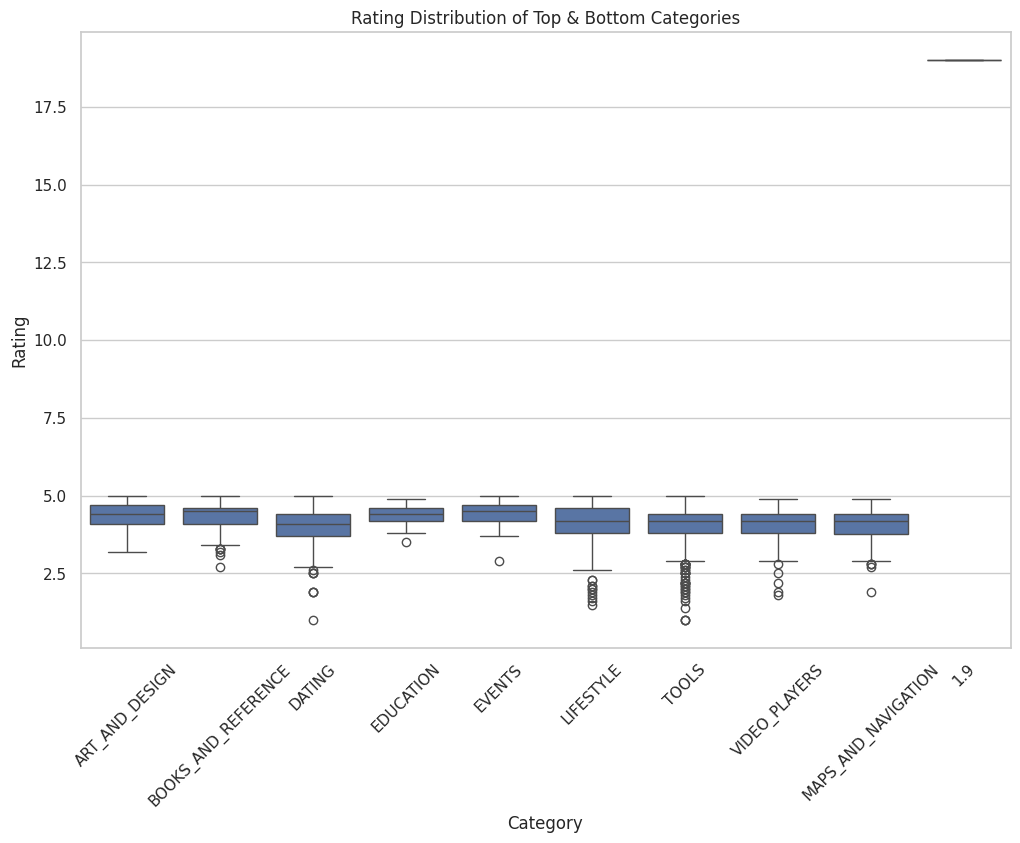

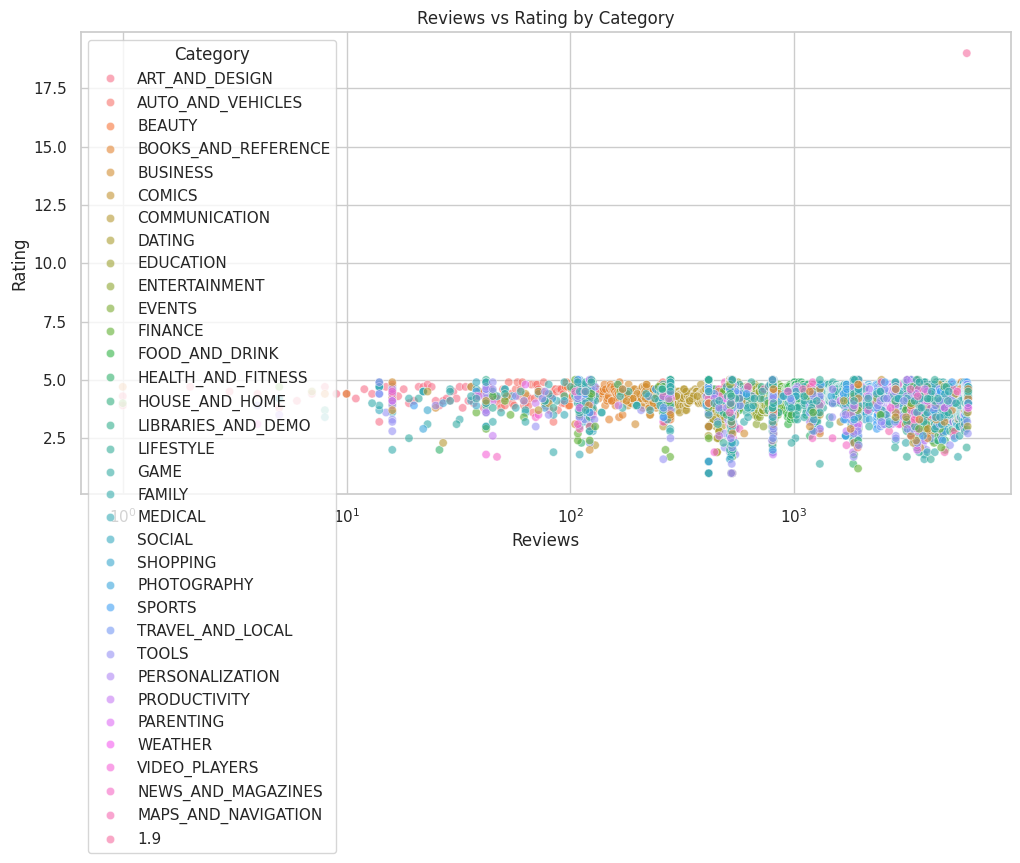

Correlation of rating with other numeric features:
 Rating    1.0
Name: Rating, dtype: float64


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ---- Load the data ----
# Change path or URL according to where your app dataset is
df = pd.read_csv("googleplaystoredata.csv")

print("Columns:", df.columns.tolist())
display(df.head())

# ---- Clean / preprocess ----
# Look for category and rating columns
# Let's try to guess common names:
possible_cat = [c for c in df.columns if "cat" in c.lower()]
possible_rating = [c for c in df.columns if "rating" in c.lower()]

print("Possible category columns:", possible_cat)
print("Possible rating columns:", possible_rating)

cat_col = possible_cat[0]  # pick first
rating_col = possible_rating[0]

# Convert rating to numeric (if not already)
df[rating_col] = pd.to_numeric(df[rating_col], errors="coerce")

# Drop invalid ratings
df2 = df.dropna(subset=[cat_col, rating_col])

# ---- Compute average rating by category ----
cat_rating = df2.groupby(cat_col)[rating_col].agg(['mean', 'count', 'median']).reset_index()
cat_rating = cat_rating.sort_values("mean", ascending=False)
display(cat_rating)

# ---- Plot average rating by category ----
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_rating, x="mean", y=cat_col, palette="viridis", order=cat_rating[cat_rating["count"] > 20][cat_col])
plt.xlabel("Average Rating")
plt.ylabel("App Category")
plt.title("Average App Rating by Category (only categories with >20 apps)")
plt.show()

# ---- Distribution of ratings per category ----
# (for top & bottom few categories)
top = cat_rating.head(5)[cat_col].tolist()
bottom = cat_rating.tail(5)[cat_col].tolist()

selected = top + bottom

plt.figure(figsize=(12, 8))
sns.boxplot(data=df2[df2[cat_col].isin(selected)], x=cat_col, y=rating_col)
plt.xticks(rotation=45)
plt.title("Rating Distribution of Top & Bottom Categories")
plt.show()

# ---- Possible reason exploration ----
# You can further inspect other features per category, e.g., number of reviews
if "Reviews" in df2.columns:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df2, x="Reviews", y=rating_col, hue=cat_col, alpha=0.6)
    plt.xscale("log")
    plt.title("Reviews vs Rating by Category")
    plt.show()

# ---- Correlation / deeper analysis ----
# Compute correlation between rating and other numeric features, grouped by category
num = df2.select_dtypes(include="number")
corr = num.corr()[rating_col].sort_values(ascending=False)
print("Correlation of rating with other numeric features:\n", corr)


#Q8. a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened? b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?

In [35]:
df = pd.read_csv("TitanicDataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [43]:
z = df.Survived.value_counts()
z

,count
Survived,
0,549
1,342


In [46]:
survival_by_class = df.groupby("Pclass")["Survived"].mean()*100
print("Survival Rates by Passenger Class :")
print(survival_by_class)
best_class = survival_by_class.idxmax()
print(f"Class with Highest Survival rate : Pclass {best_class}")

Survival Rates by Passenger Class :
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Class with Highest Survival rate : Pclass 1


#Possible conclusions
1. First-class cabins were on upper decks, closest to lifeboats.

2. Third-class passengers were deep inside the ship.

3. More women + children in 1st class

4. Crew helped first-class passengers reach lifeboats earlier.

In [48]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')


survival_rates = df.groupby('Age_Group')['Survived'].mean() * 100
counts = df.groupby('Age_Group')['Survived'].value_counts()

print("Survival Rates (%):")
print(survival_rates)
print("\nCounts:")
print(counts)

print("\nConclusion:")
if survival_rates['Child'] > survival_rates['Adult']:
    print("✔ Children had a higher chance of survival.")
else:
    print("✖ Children did NOT have a higher chance of survival.")


Survival Rates (%):
Age_Group
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64

Counts:
Age_Group  Survived
Adult      0           497
           1           281
Child      1            61
           0            52
Name: count, dtype: int64

Conclusion:
✔ Children had a higher chance of survival.


#Q9. How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window. b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?


Columns: ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
Rows: 300153


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Detected price cols: ['price']
Detected days cols: ['days_left']
Detected airline cols: ['airline']


/usr/local/lib/python3.12/dist-packages/scipy/interpolate/_interpolate.py:497: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


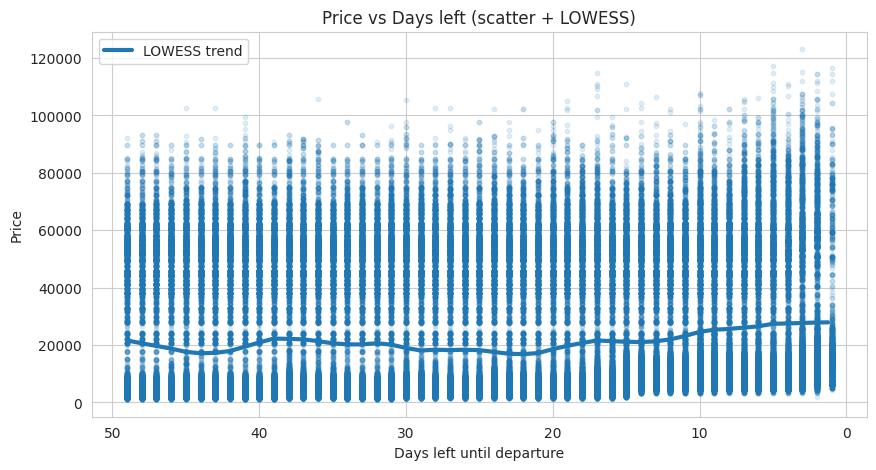

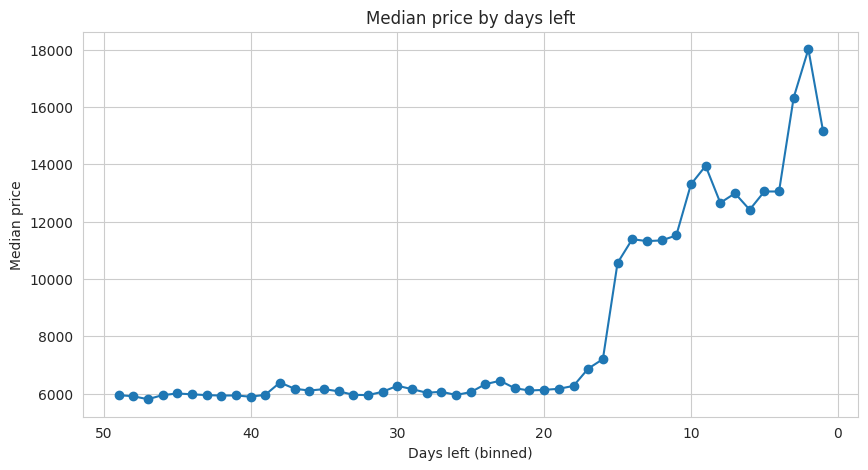

Exponential fit: price ~ 13320.07 * exp(-0.08390 * days) + 5220.72


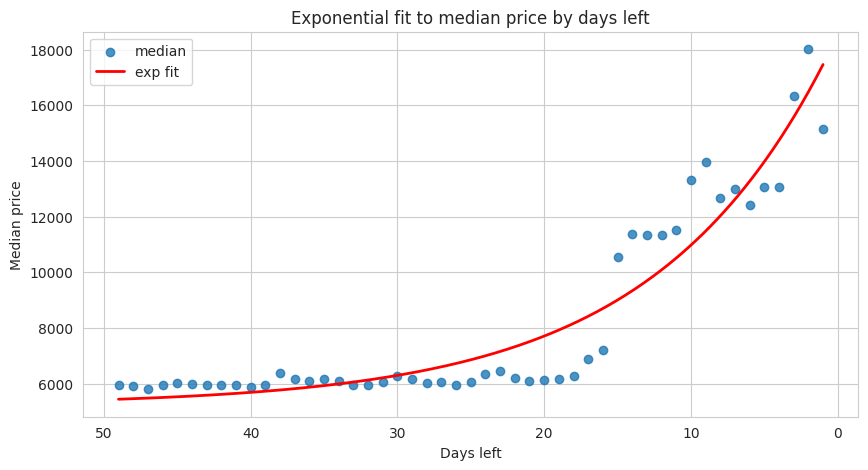

Threshold for surge (diff log) : 0.12789276433345845
Detected surge windows around day centers (index positions):
  surge between days 3.0 -> 4.0, jump=0.224
  surge between days 10.0 -> 11.0, jump=0.144
  surge between days 15.0 -> 16.0, jump=0.382

Recommendation based on median prices:
  Minimum median price: 5806.00
  Best booking window: days_left in [25 .. 49]
  (This is the days-left range with median prices within 5% of the global minimum.)
Could not auto-detect Delhi-Mumbai route. Showing overall airline comparison (all routes).


,count,median,mean,std,q25,q75
airline,,,,,,
AirAsia,16098,3276.0,4091.072742,2824.055172,2361.0,4589.0
Indigo,43120,4453.0,5324.216303,3268.894831,3219.0,6489.0
GO_FIRST,23173,5336.0,5652.007595,2513.865560,4205.0,6324.0
SpiceJet,9011,5654.0,6179.278881,2999.630406,4197.0,7412.0
Air_India,80892,11520.0,23507.019112,20905.116909,5623.0,45693.0
Vistara,127859,15543.0,30396.536302,25637.159445,6412.0,55377.0


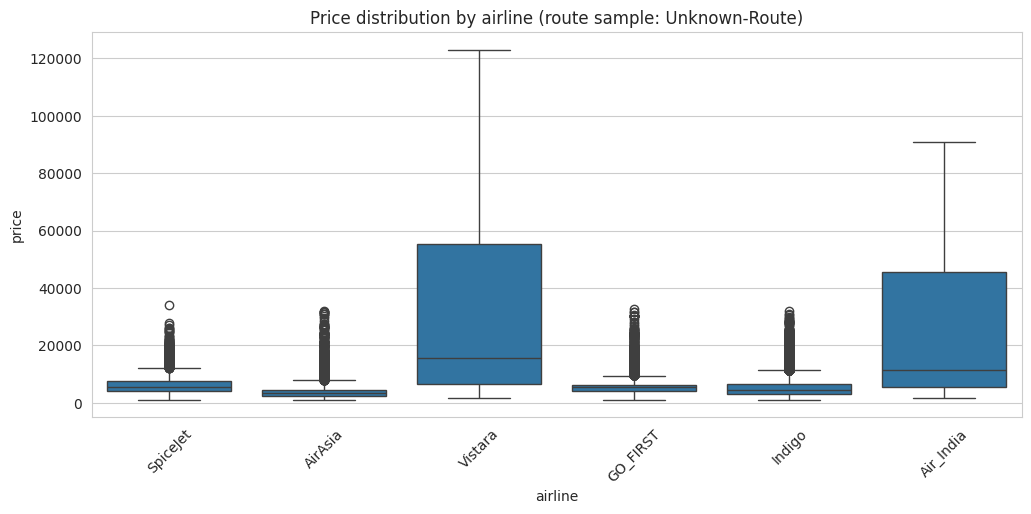

Global median price on this route (or dataset sample): 7425.0


,count,median,mean,q25,q75,category
airline,,,,,,
AirAsia,16098,3276.0,4091.072742,2361.0,4589.0,cheaper
Indigo,43120,4453.0,5324.216303,3219.0,6489.0,cheaper
GO_FIRST,23173,5336.0,5652.007595,4205.0,6324.0,cheaper
SpiceJet,9011,5654.0,6179.278881,4197.0,7412.0,cheaper
Air_India,80892,11520.0,23507.019112,5623.0,45693.0,premium
Vistara,127859,15543.0,30396.536302,6412.0,55377.0,premium


In [60]:
# Flight price analysis by days left + airline comparison
# Run in Colab / Jupyter. Requires: pandas, numpy, matplotlib, seaborn, statsmodels, scipy
# pip install if needed:
# !pip install pandas numpy matplotlib seaborn statsmodels scipy

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.optimize import curve_fit
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style("whitegrid")

# --- EDIT THIS: either raw URL or local path ---
DATA_URL = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv"
LOCAL_PATH = None   # e.g., "flight_price.csv" if you upload the CSV locally

# Load dataset
if LOCAL_PATH and os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH)
else:
    df = pd.read_csv(DATA_URL)

# Quick preview
print("Columns:", df.columns.tolist())
print("Rows:", df.shape[0])
display(df.head())

# ---- Basic cleaning ----
# Common column names used in flight datasets include: 'price', 'days_left', 'airline', 'source', 'destination', 'route'
# Try to detect likely names:
possible_price_cols = [c for c in df.columns if 'price' in c.lower()]
possible_days_cols = [c for c in df.columns if 'day' in c.lower() and ('left' in c.lower() or 'to' in c.lower())] \
                    or [c for c in df.columns if 'days' in c.lower()]
possible_airline = [c for c in df.columns if 'airline' in c.lower() or 'carrier' in c.lower()]
print("Detected price cols:", possible_price_cols)
print("Detected days cols:", possible_days_cols)
print("Detected airline cols:", possible_airline)

# Adjust names if different
# Replace these variable names to match your CSV
price_col = possible_price_cols[0] if possible_price_cols else 'price'
days_col = possible_days_cols[0] if possible_days_cols else 'days_left'
airline_col = possible_airline[0] if possible_airline else 'airline'

# Ensure types
df = df.rename(columns={price_col: 'price', days_col: 'days_left', airline_col: 'airline'}, errors='ignore')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['days_left'] = pd.to_numeric(df['days_left'], errors='coerce')

# Drop bad rows
df = df.dropna(subset=['price', 'days_left'])
df = df[(df['price'] > 0) & (df['days_left'] >= 0)]

# Optionally: create route column if source/dest exist
if 'source' in df.columns and 'destination' in df.columns:
    df['route'] = df['source'].astype(str) + "-" + df['destination'].astype(str)
elif 'route' not in df.columns:
    # fallback: try to infer or create generic route column
    df['route'] = df.get('route', 'Unknown-Route')

# ---- Part A: Price vs days_left ----
# 1) Scatter + LOWESS trend
plt.figure()
plt.scatter(df['days_left'], df['price'], alpha=0.12, s=10)
# LOWESS on a representative sample to speed up
sample = df.sample(n=min(4000, df.shape[0]), random_state=1)
lo = lowess(sample['price'], sample['days_left'], frac=0.15, it=0)
xs = np.linspace(df['days_left'].min(), df['days_left'].max(), 200)
# Interpolate LOWESS for xs
from scipy.interpolate import interp1d
f_lo = interp1d(lo[:,0], lo[:,1], bounds_error=False, fill_value="extrapolate")
plt.plot(xs, f_lo(xs), lw=3, label='LOWESS trend')
plt.gca().invert_xaxis()  # optional: show days_left decreasing to the right
plt.xlabel('Days left until departure')
plt.ylabel('Price')
plt.title('Price vs Days left (scatter + LOWESS)')
plt.legend()
plt.show()

# 2) Median price per day_left (or binned)
median_by_day = df.groupby('days_left')['price'].median().reset_index().sort_values('days_left', ascending=False)
# If days are many distinct values, bin them
if median_by_day.shape[0] > 200:
    bins = np.quantile(median_by_day['days_left'], np.linspace(0,1,100))
    median_by_day['day_bin'] = pd.cut(median_by_day['days_left'], bins=bins, include_lowest=True)
    median_series = df.groupby('day_bin')['price'].median().reset_index()
    # compute bin center
    median_series['day_center'] = median_series['day_bin'].apply(lambda x: x.mid)
    x = median_series['day_center'].astype(float).values
    y = median_series['price'].values
else:
    x = median_by_day['days_left'].values
    y = median_by_day['price'].values

plt.figure()
plt.plot(x, y, marker='o')
plt.gca().invert_xaxis()
plt.xlabel('Days left (binned)')
plt.ylabel('Median price')
plt.title('Median price by days left')
plt.show()

# 3) Fit exponential model on binned medians: price = a * exp(b * days)
def exp_model(t, a, b, c):
    # c is additive offset
    return a * np.exp(b * t) + c

# we fit on x (days) and y (median price)
# For numeric stability, scale days to e.g., days_norm = (x - x.mean()) / x.std()
x_arr = np.array(x, dtype=float)
y_arr = np.array(y, dtype=float)
# Sort by increasing days_left if needed
order = np.argsort(x_arr)
x_arr = x_arr[order]
y_arr = y_arr[order]

# Initial guesses
try:
    p0 = [np.median(y_arr), -0.01, 0.0]  # negative b means price decreases as days increase
    popt, pcov = curve_fit(exp_model, x_arr, y_arr, p0=p0, maxfev=10000)
    a_fit, b_fit, c_fit = popt
    perr = np.sqrt(np.diag(pcov))
    print(f"Exponential fit: price ~ {a_fit:.2f} * exp({b_fit:.5f} * days) + {c_fit:.2f}")
except Exception as e:
    print("Exponential fit failed:", e)
    popt = None

if popt is not None:
    plt.figure()
    plt.scatter(x_arr, y_arr, label='median', alpha=0.8)
    xs_fine = np.linspace(x_arr.min(), x_arr.max(), 300)
    plt.plot(xs_fine, exp_model(xs_fine, *popt), color='red', lw=2, label='exp fit')
    plt.gca().invert_xaxis()
    plt.xlabel('Days left')
    plt.ylabel('Median price')
    plt.title('Exponential fit to median price by days left')
    plt.legend()
    plt.show()

# 4) Detect surge windows (large day-to-day jumps)
# compute diff of log(median price) to get multiplicative jumps
log_y = np.log(y_arr + 1e-6)
dlog = -np.diff(log_y)  # negative because days sorted descending; adjust sign if needed
# We'll flag positions where dlog exceeds threshold (e.g., 95th percentile)
thresh = np.nanpercentile(dlog, 95)
surge_indices = np.where(dlog > thresh)[0]
print("Threshold for surge (diff log) :", thresh)
if len(surge_indices) > 0:
    print("Detected surge windows around day centers (index positions):")
    for idx in surge_indices:
        d_before = x_arr[idx]
        d_after = x_arr[idx+1]
        print(f"  surge between days {d_before} -> {d_after}, jump={dlog[idx]:.3f}")
else:
    print("No large surge windows detected by the 95th percentile rule.")

# Recommend booking window: find min-median price region
mins = pd.DataFrame({'days': x_arr, 'median_price': y_arr})
min_med = mins['median_price'].min()
best_days = mins[mins['median_price'] <= (min_med * 1.05)]  # within 5% of min
print("\nRecommendation based on median prices:")
print(f"  Minimum median price: {min_med:.2f}")
if not best_days.empty:
    print(f"  Best booking window: days_left in [{best_days['days'].min():.0f} .. {best_days['days'].max():.0f}]")
    print("  (This is the days-left range with median prices within 5% of the global minimum.)")
else:
    print("  No clean window found; consider looking at the lower quantiles or specific airlines/routes.")

# ---- Part B: Compare airlines on a route (example: Delhi-Mumbai) ----
# Adjust this filter depending on dataset's route naming; common names: 'DEL', 'BOM', 'Mumbai', 'Delhi'
route_to_check = None
# try to detect common Delhi and Mumbai tokens
for tokenA in ['Delhi', 'DEL', 'delhi', 'del']:
    for tokenB in ['Mumbai', 'BOM', 'MUM', 'mum', 'mumbai']:
        # find rows where route contains both tokens (case-insensitive)
        mask = df['route'].astype(str).str.contains(tokenA, case=False) & df['route'].astype(str).str.contains(tokenB, case=False)
        if mask.sum() > 5:
            route_to_check = df[mask]
            print(f"Found route sample using tokens {tokenA}-{tokenB}, rows: {mask.sum()}")
            break
    if route_to_check is not None:
        break

if route_to_check is None:
    print("Could not auto-detect Delhi-Mumbai route. Showing overall airline comparison (all routes).")
    route_to_check = df.copy()

# Compute airline statistics
air_stats = route_to_check.groupby('airline')['price'].agg(['count', 'median', 'mean', 'std', lambda x: np.percentile(x, 25), lambda x: np.percentile(x,75)])
air_stats.columns = ['count', 'median', 'mean', 'std', 'q25', 'q75']
air_stats = air_stats.sort_values('median')
display(air_stats)

# Boxplot
plt.figure(figsize=(12,5))
# only plot airlines with enough samples
min_samples = 20
plot_airlines = air_stats[air_stats['count'] >= min_samples].index.tolist()
sns.boxplot(x='airline', y='price', data=route_to_check[route_to_check['airline'].isin(plot_airlines)])
plt.xticks(rotation=45)
plt.title(f"Price distribution by airline (route sample: {route_to_check['route'].iloc[0] if 'route' in route_to_check.columns else 'All routes'})")
plt.show()

# Summary: mark cheaper/premium
global_median = route_to_check['price'].median()
air_stats['category'] = 'mid'
air_stats.loc[air_stats['median'] <= global_median * 0.85, 'category'] = 'cheaper'
air_stats.loc[air_stats['median'] >= global_median * 1.15, 'category'] = 'premium'
print("Global median price on this route (or dataset sample):", global_median)
display(air_stats[['count','median','mean','q25','q75','category']])


#Q10.  What factors most strongly correlate with employee attrition? Use visualizations to show key  drivers (e.g., satisfaction, overtime, salary). b). Are employees with more projects more likely to leave?


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hr_analytics.csv")
df.head()




,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


Columns in dataset:
['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']

Preview:


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2



Detected attrition column: MaritalStatusID

Unique values in Attrition_flag: [0 1 2 4 3]

Correlation with Attrition:
Attrition_flag            1.000000
MarriedID                 0.164044
EmpStatusID               0.114630
Termd                     0.099367
PerfScoreID               0.044693
FromDiversityJobFairID    0.041117
EngagementSurvey          0.033249
ManagerID                 0.023065
PositionID                0.021923
Absences                  0.018722
DeptID                    0.012768
Zip                       0.010620
EmpSatisfaction           0.002068
GenderID                 -0.030236
EmpID                    -0.043851
SpecialProjectsCount     -0.051093
Salary                   -0.070291
DaysLateLast30           -0.096500
Name: Attrition_flag, dtype: float64


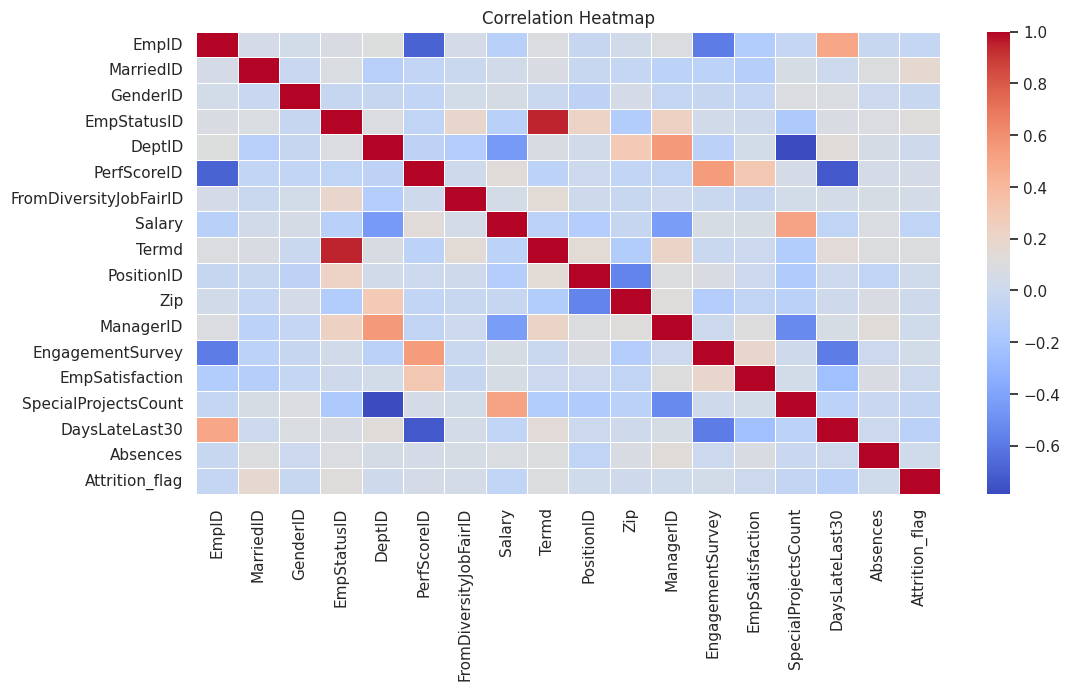

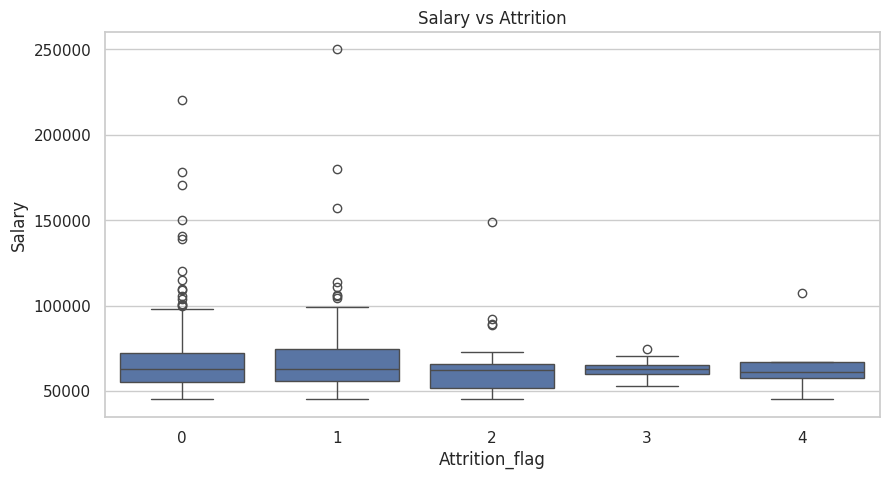


Detected project column: SpecialProjectsCount


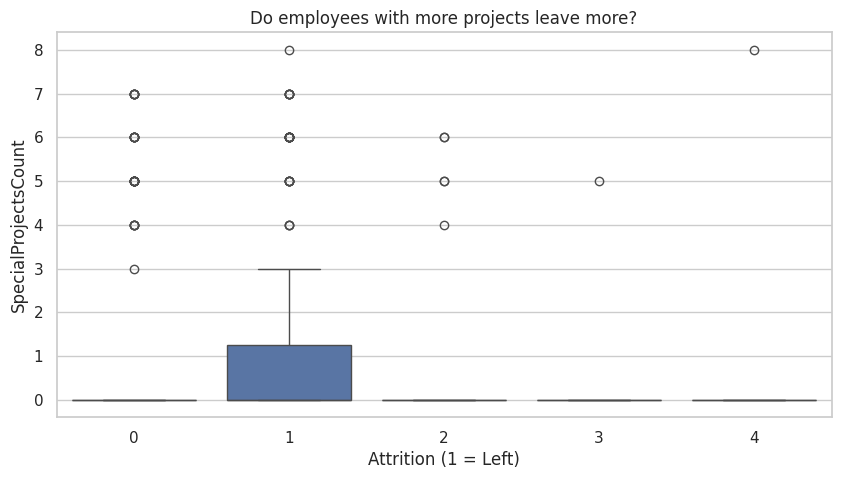


Average projects:
Attrition_flag
0    1.218978
1    1.395161
2    0.866667
3    0.416667
4    1.000000
Name: SpecialProjectsCount, dtype: float64

================= SUMMARY =================
1. The above correlations tell you which numerical features drive attrition.
2. The boxplots help identify differences in satisfaction, overtime, salary.
3. The last section shows if more projects = higher attrition.


In [69]:
# ============================================================
#  HR ANALYTICS — ATTRITION DRIVER ANALYSIS (SAFE VERSION)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
df = pd.read_csv("hr_analytics.csv")      # <-- rename if needed

print("Columns in dataset:")
print(df.columns.tolist())
print("\nPreview:")
display(df.head())

# ------------------------------------------------------------
# 2. Identify the Attrition Column Automatically
# ------------------------------------------------------------
possible_attr_cols = [c for c in df.columns if
                      "attrition" in c.lower() or
                      "left" in c.lower() or
                      "leave" in c.lower() or
                      "turnover" in c.lower() or
                      "status" in c.lower()]

if not possible_attr_cols:
    raise ValueError("Could not detect attrition column. Tell me your dataset column names.")

attr_col = possible_attr_cols[0]
print("\nDetected attrition column:", attr_col)

# ------------------------------------------------------------
# 3. Create a binary Attrition Flag
# ------------------------------------------------------------
df[attr_col] = df[attr_col].astype(str)

df['Attrition_flag'] = df[attr_col].replace({
    "Yes":1, "No":0,
    "yes":1, "no":0,
    "1":1, "0":0,
    "Resigned":1, "Employed":0,
    "Left":1, "Stayed":0
}).astype(int)

print("\nUnique values in Attrition_flag:", df['Attrition_flag'].unique())


# ------------------------------------------------------------
# 4. Correlation of numerical features with Attrition
# ------------------------------------------------------------
num_cols = df.select_dtypes(include=['number'])
corr = num_cols.corr()['Attrition_flag'].sort_values(ascending=False)

print("\nCorrelation with Attrition:")
print(corr)

plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr(), cmap="coolwarm", linewidths=0.4)
plt.title("Correlation Heatmap")
plt.show()


# ------------------------------------------------------------
# 5. Key Drivers Visualization
# ------------------------------------------------------------

# Satisfaction (if present)
for col in ["JobSatisfaction", "EnvironmentSatisfaction", "WorkLifeBalance"]:
    if col in df.columns:
        plt.figure()
        sns.boxplot(x=df['Attrition_flag'], y=df[col])
        plt.title(f"{col} vs Attrition")
        plt.xlabel("Attrition (1 = Left)")
        plt.show()

# Overtime
if "OverTime" in df.columns:
    plt.figure()
    sns.countplot(x="OverTime", hue="Attrition_flag", data=df)
    plt.title("OverTime vs Attrition")
    plt.show()

# Salary
for col in ["MonthlyIncome", "Salary", "Income"]:
    if col in df.columns:
        plt.figure()
        sns.boxplot(x=df['Attrition_flag'], y=df[col])
        plt.title(f"{col} vs Attrition")
        plt.show()


# ------------------------------------------------------------
# 6. Are employees with more projects more likely to leave?
# ------------------------------------------------------------
possible_proj_cols = [c for c in df.columns if
                      "project" in c.lower() or
                      "projects" in c.lower() or
                      "num" in c.lower() and "project" in c.lower()]

if possible_proj_cols:
    proj_col = possible_proj_cols[0]
    print("\nDetected project column:", proj_col)

    plt.figure()
    sns.boxplot(x=df['Attrition_flag'], y=df[proj_col])
    plt.title("Do employees with more projects leave more?")
    plt.xlabel("Attrition (1 = Left)")
    plt.show()

    print("\nAverage projects:")
    print(df.groupby("Attrition_flag")[proj_col].mean())
else:
    print("\nNo 'projects' column detected in your dataset.")


# ------------------------------------------------------------
# 7. Summary insights
# ------------------------------------------------------------
print("\n================= SUMMARY =================")
print("1. The above correlations tell you which numerical features drive attrition.")
print("2. The boxplots help identify differences in satisfaction, overtime, salary.")
print("3. The last section shows if more projects = higher attrition.")
